![WeTheGeeksV3.jpg](https://raw.githubusercontent.com/ptsireunion/CPGE-PT-Reunion/main/WeTheGeeksV3.jpg)
 
<div class="alert alert-block alert-info">
    <b> PYTHON – Capacité Numérique  
</div>

# - OSCILLATEUR QUASI-SINUSOIDAL -
> Physique Chimie `CPGE PT` lien vers le blog <a> https://cpge-reunion-ptsi.blogspot.com/p/info-pyhton.html </a>
    >> Sujet inspiré par diverses lectures. Merci à leurs contributeurs.trices

Dans ce notebook, on revient sur les résultats du cours concernant `l'oscillateur quasi-sinusoïdal à pont de Wien` et en particulier on cherchera, après rappels des équations, à représenter le`démarrage des oscillations`. On utilisera à profit une méthode de résolution à l'aide de la fonction `odeint` en `vectorisant` les équations afin de retrouver le formalisme du 1er ordre. 

# Etude théorique

On s'intéresse au circuit ci-dessous dans lequel un montage amplificateur à ALI est couplé à un filtre passe-bande de Wien :
![TH1_Oscillateur.png](https://raw.githubusercontent.com/ptsireunion/CPGE-PT-Reunion/main/TH1_Oscillateur.png)


## Etude en régime linéaire  : zone d'amplification

> **Question 1**
>
> Démontrer en régime linéaire, que la partie ALI a pour fonction de transfert :
$$\underline{H}_\text{ALI}=\dfrac{R_1+R_2}{R_2}$$

> **Question 2**
>
> Démontrer en régime linéaire, que la partie filtre de Wien a pour fonction de transfert :
$$\underline{H}_\text{Wien}=\dfrac{\text{j}RC\omega}{1+3\text{j}RC\omega-R^2C^2\omega^2}$$

> **Question 3**
>
> Démontrer en exploitant les deux relations ci-dessus, et la condition de bouclage, on peut établir l'équation différentielle de l'oscillateur, en régime linéaire : 
$$\boxed{
R^2C^2\dfrac{\text{d}^2u_s}{\text{d}t^2}+\dfrac{RC}{R_2}(2R_2-R_1)\dfrac{\text{d}u_s}{\text{d}t}+u_s=0
}$$


## Etude en régime saturé : zone d'amortissement

En régime de saturation, il faut s'intéresser à la condition de bascule de $+U_\text{sat}$ à $-U_\text{sat}$ et vice-versa. 
> **Question 4**
>
> Démontrer à l'aide de la Question 2 que l'ALI :
>* reste en saturation positive tant que $u_s>\frac{R_2}{R_1+R_2}U_\text{sat}$, et alors : 
>$$\boxed{
R^2C^2\dfrac{\text{d}^2u_s}{\text{d}t^2}+3RC\dfrac{\text{d}u_s}{\text{d}t}+u_s=0
}$$
>
>
>* reste en saturation négative tant que $u_s<-\frac{R_2}{R_1+R_2}U_\text{sat}$, et alors : 
>$$\boxed{
R^2C^2\dfrac{\text{d}^2u_s}{\text{d}t^2}+3RC\dfrac{\text{d}u_s}{\text{d}t}+u_s=0
}$$

> **Question 5**
>
>Les deux équations différentielles sont du deuxième ordre à coefficients constants et font apparaître la même pulsation propre $\omega_0=1/RC$. La première est conditionnellement stable, et la deuxième toujours stable. 
>
>Démontrer que L'apparition d'oscillations n'est possible que si la première équation différentielle est instable, soit $R_1>2R_2$.

## Etude numérique

&nbsp;
Après import des librairies, on crée des variables associées aux diverses grandeurs, ainsi qu'une condition initiale de "bruit électronique", sous la forme d'un vecteur `xv0` qui contient une tension nulle, mais une dérivée initiale non nulle.

In [3]:
# import des librairies 
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [3]:
### Données propres aux divers blocs électrocinétiques
## Montage amplificateur à ALI
R1 = 2200. # résistance N°1 de l'amplificateur
R2 = 1000. # résistance N°2 de l'amplificateur
Usat = 15. # tension de saturation de l'ALI

## Montage filtre passe-bande de Wien
R=1000. # résistance du filtre
C=100E-9 # capacité du filtre
omega0=1/(R*C) # pulsation propre

## Bruit électronique initial servant de condition initiale
xv0 = [0,1e-3*2*np.pi*omega0]

### Paramètres numériques d'intégration
Tmax = 20*(2*np.pi/omega0)
nd = 20000
t = np.linspace(0.0,Tmax,nd)

On code alors l'équation différentielle sous la forme vectorielle compatible avec `odeint` :
$$\dfrac{\text{d}}{\text{d}t}X=f(X,t)$$

où $X=\left[\begin{array}{c} u_s \\ \dot{u_s} \end{array}\right]$ est la grandeur que l'on cherche à résoudre, on la note `xv`.

et la fonction vectorielle $f$, codé sous le nom `osc_QS_wien`, dépend du résultat obtenu pour $u_s$ :

> **Question 6**
>Montrer que
>>* si $\left|u_s\right|\leq \frac{R_2}{R_1+R_2}U_\text{sat}$ : 
$$f(X,t)=\left[\begin{array}{c} \dot{u_s} \\ -\frac{1}{R^2C^2}u_s-\frac{2R_2-R_1}{CR_2R}\dot{u_s} \end{array}\right]$$
>>* sinon 
$${f(X,t)=\left[\begin{array}{c} \dot{u_s} \\ -\frac{1}{R^2C^2}u_s-\frac{3}{RC}\dot{u_s} \end{array}\right]}$$

> **Question 7**
>Ecrire la fonction osc_QS_wien qui prend comme argument la matrice X et une matrice temps t qui renvoie f en fonction de la Question 6

In [11]:
### Fonction décrivant le comportement de l'oscillateur
def osc_QS_wien(xv,t): 
    # Si la tension de sortie est plus faible que la condition de bascule le montage est instable
    if [........... :
        return [........... ,...............]
    # Sinon le montage est stabilisé par le passage en saturation de l'ALI
    else :
        return [........... ,...............]

> **Question 8**
> Ecrire le code qui utilise la fonction odeint et résout l’équation vectorielle. 
> Extraire les données utiles pour représenter
>>* la loi horaire ;
>>* le portrait de phase.

In [12]:
### Intégration numérique à l'aide d'odeint et des conditions initiales de bruit
xv = odeint(osc_QS_wien,xv0,t)
# extraction des données de tension et de sa dérivée pour un diagramme de phase
X = xv[:,0]
Xpoint = xv[:,1]

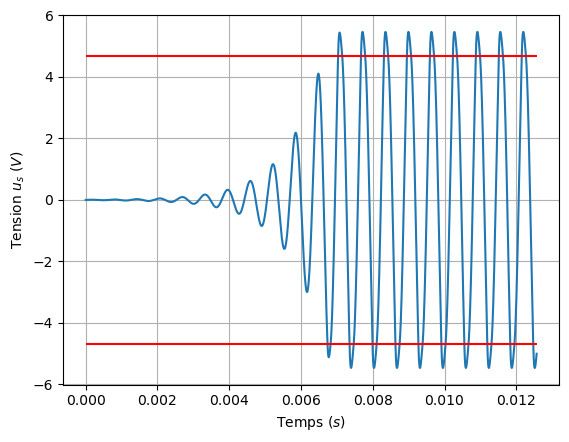

In [13]:
## On trace l'évolution temporelle de la tension de sortie du filtre
plt.figure('Signal')
plt.plot(t,X)
plt.hlines(R2*Usat/(R1+R2),min(t),max(t),color='r')
plt.hlines(-R2*Usat/(R1+R2),min(t),max(t),color='r')
plt.grid(True)
plt.xlabel(r'Temps $(s)$')
plt.ylabel(r'Tension $u_s$ $(V)$')
plt.show()

Les lignes rouges représentent les frontières $\left|u_s\right|\leq \frac{R_2}{R_1+R_2}U_\text{sat}$. On peut alors remarquer l'effet stabilisant du fonctionnement en saturation de l'ALI.

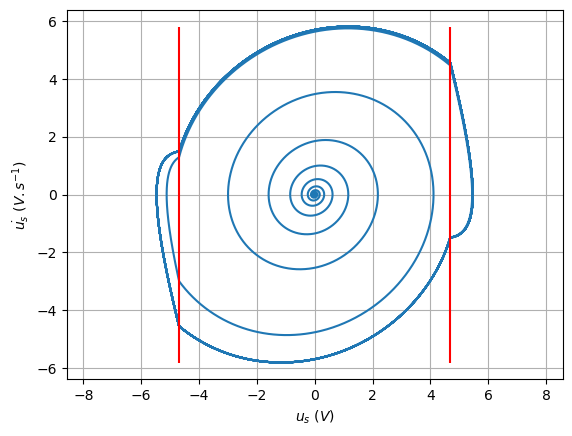

In [7]:
## On trace le portrait de phase de la tension de sortie du filtre
plt.figure('Portrait de phase')
plt.grid(True)
plt.axis('equal')
plt.plot(X,Xpoint/omega0)
plt.vlines(R2*Usat/(R1+R2),min(Xpoint/omega0),max(Xpoint/omega0),color='r')
plt.vlines(-R2*Usat/(R1+R2),min(Xpoint/omega0),max(Xpoint/omega0),color='r')
plt.xlabel(r'$u_s$ $(V)$')
plt.ylabel(r'$\dot{u_s}$ $(V.s^{-1})$')
plt.show()

La bascule périodique entre régime linéaire et de saturation du fonctionnement de l'ALI a pour conséquence un enrichissement spectral du signal obtenu, d'autant plus flagrant que la durée passée en mode de saturation est grande.

&nbsp;
On peut le vérifier en traçant le spectre du signal, et en modifiant les paramètres de fonctionnement de l'oscillateur.

In [ ]:
## On utilise le module fft.fft de scipy
Y = fft.fft(X,nd)
nf=nd/20 # Affichage réduit de la plage de fréquences calculées
Y = Y[:int(nf)]
frq = np.arange(nd)/(Tmax) # Création de l'axe des abscisses
frq = frq[:int(nf)]
imax=np.argmax(abs(Y)) # On cherche la valeur maximale de la FFT pour normalisation

plt.figure('FFT')
plt.plot(frq,abs(Y)/max(abs(Y)))
plt.grid(True)
plt.xlabel(r'Fréquence $(Hz)$')
plt.ylabel(r'Amplitude normalisée')
plt.show()

print("La pulsation dominante du signal de sortie est : ",format(2*np.pi*frq[imax],"#.3e"),"rad.s^{-1}")
print("La pusation propre est : ",format(omega0,"#.3e"),"rad.s^{-1}")